<a id='top'></a>

# Data Engineering of TransferMarkt Data
##### Notebook to engineer data scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) by [ewenme](https://github.com/ewenme/transfers).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 03/08/2021<br>
Notebook last updated: 03/08/2021

![title](../../img/transfermarkt-logo-banner.png)

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers transfer data data from [TransferMarkt](https://www.transfermarkt.co.uk/) provided by [ewenme](https://github.com/ewenme/transfers), and manipulates this landed data as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [2]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Currency Convert
from forex_python.converter import CurrencyRates

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [3]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [4]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [5]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [6]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
[TransferMarkt](https://www.transfermarkt.co.uk/) is a German-based website owned by [Axel Springer](https://www.axelspringer.com/en/) and is the leading website for the football transfer market. The website posts football related data, including: scores and results, football news, transfer rumours, and most usefully for us - calculated estimates ofthe market values for teams and individual players.

To read more about how these estimations are made, [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann does an excellent job of explaining how the estimations are made and their level of accuracy.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

<a id='section3.1'></a>

### <a id='#section3.2'>3.2. Read in Data</a>

In [9]:
# Show files individual files in directory
all_files = glob.glob(os.path.join(data_dir + '/tm/raw/transfers/*/*.csv'))
all_files

['../../data/tm/raw/transfers/2013/italian_serie_a.csv',
 '../../data/tm/raw/transfers/2013/english_premier_league.csv',
 '../../data/tm/raw/transfers/2013/english_championship.csv',
 '../../data/tm/raw/transfers/2013/french_ligue_1.csv',
 '../../data/tm/raw/transfers/2013/portugese_liga_nos.csv',
 '../../data/tm/raw/transfers/2013/german_bundesliga_1.csv',
 '../../data/tm/raw/transfers/2013/spanish_primera_division.csv',
 '../../data/tm/raw/transfers/2013/dutch_eredivisie.csv',
 '../../data/tm/raw/transfers/2013/russian_premier_liga.csv',
 '../../data/tm/raw/transfers/2014/italian_serie_a.csv',
 '../../data/tm/raw/transfers/2014/english_premier_league.csv',
 '../../data/tm/raw/transfers/2014/english_championship.csv',
 '../../data/tm/raw/transfers/2014/french_ligue_1.csv',
 '../../data/tm/raw/transfers/2014/portugese_liga_nos.csv',
 '../../data/tm/raw/transfers/2014/german_bundesliga_1.csv',
 '../../data/tm/raw/transfers/2014/spanish_primera_division.csv',
 '../../data/tm/raw/transfer

In [13]:
lst_all_leagues = []

for filename in all_files:
    df_temp = pd.read_csv(filename, index_col=None, header=0)
    lst_all_leagues.append(df_temp)

df_transfers_all = pd.concat(lst_all_leagues, axis=0, ignore_index=True)

df_transfers_all = df_transfers_all.sort_values(['season', 'league_name', 'club_name', 'player_name'], ascending=[True, True, True, True])

In [14]:
df_transfers_all.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
42905,1. FC Köln,Adrian Spyrka,24.0,Central Midfield,Stuttg. Kickers,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
42961,1. FC Köln,Andrzej Kobylanski,22.0,Left Midfield,Siarka T.,£270Th.,in,Winter,0.270,1 Bundesliga,1992,1992/1993
42906,1. FC Köln,Andrzej Rudy,26.0,Attacking Midfield,Bröndby IF,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
42903,1. FC Köln,Carsten Keuler,20.0,Centre-Back,1.FC Köln II,-,in,Summer,0.000,1 Bundesliga,1992,1992/1993
42899,1. FC Köln,Dirk Lehmann,20.0,Attacking Midfield,A. Aachen II,£14Th.,in,Summer,0.014,1 Bundesliga,1992,1992/1993


In [17]:
df_transfers_all.shape

(169432, 12)

### <a id='#section3.3'>3.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### Bio data

In [19]:
# Display the first 5 rows of the raw DataFrame, df_transfers_all
df_transfers_all.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
42905,1. FC Köln,Adrian Spyrka,24.0,Central Midfield,Stuttg. Kickers,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
42961,1. FC Köln,Andrzej Kobylanski,22.0,Left Midfield,Siarka T.,£270Th.,in,Winter,0.270,1 Bundesliga,1992,1992/1993
42906,1. FC Köln,Andrzej Rudy,26.0,Attacking Midfield,Bröndby IF,"End of loanJun 30, 1992",in,Summer,0.000,1 Bundesliga,1992,1992/1993
42903,1. FC Köln,Carsten Keuler,20.0,Centre-Back,1.FC Köln II,-,in,Summer,0.000,1 Bundesliga,1992,1992/1993
42899,1. FC Köln,Dirk Lehmann,20.0,Attacking Midfield,A. Aachen II,£14Th.,in,Summer,0.014,1 Bundesliga,1992,1992/1993


In [21]:
# Display the last 5 rows of the raw DataFrame, df_transfers_all
df_transfers_all.tail()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
102782,Udinese Calcio,Stipe Perica,25.0,Centre-Forward,Watford,?,out,Summer,NaN,Serie A,2020,2020/2021
102785,Udinese Calcio,Svante Ingelsson,22.0,Central Midfield,SC Paderborn,loan transfer,out,Summer,NaN,Serie A,2020,2020/2021
102769,Udinese Calcio,Thomas Ouwejan,23.0,Left-Back,AZ Alkmaar,loan transfer,in,Summer,NaN,Serie A,2020,2020/2021
102767,Udinese Calcio,Tolgay Arslan,30.0,Central Midfield,Fenerbahce,free transfer,in,Summer,NaN,Serie A,2020,2020/2021
102787,Udinese Calcio,William Troost-Ekong,27.0,Centre-Back,Watford,?,out,Summer,NaN,Serie A,2020,2020/2021


In [22]:
# Print the shape of the raw DataFrame, df_transfers_all
print(df_transfers_all.shape)

(169432, 12)


In [23]:
# Print the column names of the raw DataFrame, df_transfers_all
print(df_transfers_all.columns)

Index(['club_name', 'player_name', 'age', 'position', 'club_involved_name',
       'fee', 'transfer_movement', 'transfer_period', 'fee_cleaned',
       'league_name', 'year', 'season'],
      dtype='object')


The dataset has twelve features (columns).

In [26]:
# Data types of the features of the raw DataFrame, df_transfers_all
df_transfers_all.dtypes

club_name              object
player_name            object
age                   float64
position               object
club_involved_name     object
fee                    object
transfer_movement      object
transfer_period        object
fee_cleaned           float64
league_name            object
year                    int64
season                 object
dtype: object

In [27]:
# Info for the raw DataFrame, df_transfers_all
df_transfers_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169432 entries, 42905 to 102787
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   club_name           169432 non-null  object 
 1   player_name         169432 non-null  object 
 2   age                 169378 non-null  float64
 3   position            169429 non-null  object 
 4   club_involved_name  169432 non-null  object 
 5   fee                 169288 non-null  object 
 6   transfer_movement   169432 non-null  object 
 7   transfer_period     155000 non-null  object 
 8   fee_cleaned         141091 non-null  float64
 9   league_name         169432 non-null  object 
 10  year                169432 non-null  int64  
 11  season              169432 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.8+ MB


In [29]:
# Description of the raw DataFrame, df_transfers_all, showing some summary statistics for each numberical column in the DataFrame
df_transfers_all.describe()

,age,fee_cleaned,year
count,169378.000000,141091.000000,169432.000000
mean,24.365059,0.826053,2008.309741
std,6.264961,3.733409,7.663565
min,-1776.000000,0.000000,1992.000000
25%,21.000000,0.000000,2003.000000
50%,24.000000,0.000000,2009.000000
75%,27.000000,0.000000,2015.000000
max,117.000000,199.800000,2020.000000


<AxesSubplot:>

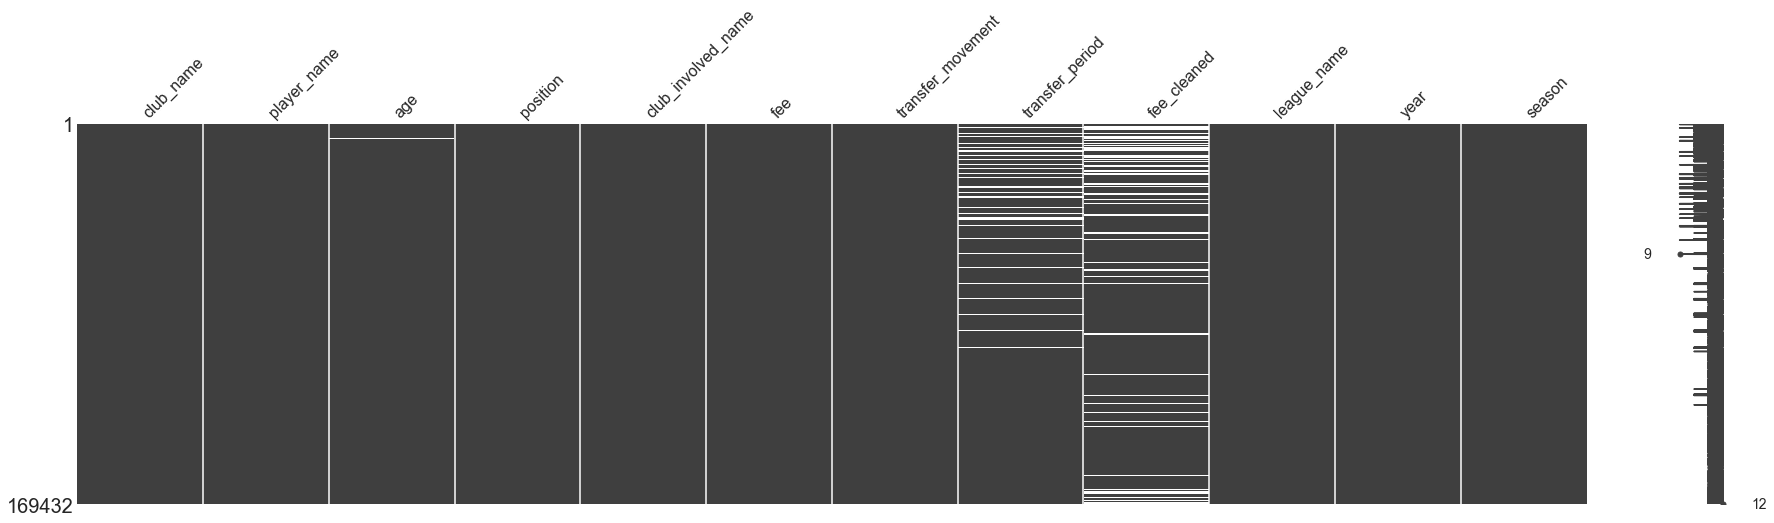

In [30]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_transfers_all
msno.matrix(df_transfers_all, figsize = (30, 7))

In [31]:
# Counts of missing values
null_value_stats = df_transfers_all.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

age                   54
position               3
fee                  144
transfer_period    14432
fee_cleaned        28341
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `age`, `position`, `fee`, and then more missing values in the `transfer_period` and `fee_cleaned` column.

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Convert to GBP (£)</a>

https://forex-python.readthedocs.io/en/latest/usage.html

In [32]:
# Currency Convert
from currency_converter import CurrencyConverter
import math

In [33]:
# Get EUR to GBP exchange rate

## Get latest currency rates
c = CurrencyConverter()

##  Get conversion rate from EUR to GBP
rate_eur_gbp = (c.convert(1, 'EUR', 'GBP'))
rate_eur_gbp

0.90053

In [68]:
# NOT NEEDED AS ALREADY IN POUNDS

# Convert Euros to Pounds
#df_transfers_all['fee_cleaned_pounds'] = df_transfers_all['fee_cleaned'] * rate_eur_gbp

### <a id='#section4.2'>4.2. Filter Players in 'Big 5' European Leagues and MLS</a>

In [34]:
df_transfers_all['league_name'].unique()

array(['1 Bundesliga', 'Championship', 'Eredivisie', 'Liga Nos',
       'Ligue 1', 'Premier League', 'Premier Liga', 'Primera Division',
       'Serie A'], dtype=object)

In [37]:
# Filter plays in the Big 5 European Leagues

## Define list of countries
lst_big5_countries = ['1 Bundesliga', 'Ligue 1', 'Premier League', 'Serie A']

## Filter list of Big 5 European League countries from DataFrame
df_transfers_big5 = df_transfers_all[df_transfers_all['league_name'].isin(lst_big5_countries)]

In [38]:
df_transfers_big5.shape

(77866, 12)

---

<a id='section5'></a>

## <a id='#section5'>5. Exporting the Engineered DataFrames</a>
Export the two engineered [TransferMarkt](https://www.transfermarkt.co.uk/) DataFrames as CSV files.

In [41]:
# Export DataFrame as a CSV file

## All data
df_transfers_all.to_csv(data_dir_tm + f'/engineered/transfers/archive/' + f'tm_transfers_all_last_updated_{today}.csv', index=None, header=True)
df_transfers_all.to_csv(data_dir_tm + f'/engineered/transfers/' + f'tm_transfers_all_latest.csv', index=None, header=True)
df_transfers_all.to_csv(data_dir + f'/export/' + f'tm_transfers_all_latest.csv', index=None, header=True)


## Big 5 European Leagues
df_transfers_big5.to_csv(data_dir_tm + f'/engineered/transfers/archive/' + f'tm_transfers_big5_last_updated_{today}.csv', index=None, header=True)
df_transfers_big5.to_csv(data_dir_tm + f'/engineered/transfers/' + f'tm_transfers_big5_latest.csv', index=None, header=True)
df_transfers_big5.to_csv(data_dir + f'/export/' + f'tm_transfers_big5_latest.csv', index=None, header=True)

## <a id='#section6'>6. Summary</a>
This Jupyter notebook engineered scraped football data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

## <a id='#section7'>7. Next Steps</a>
The step is to use this data to...

## <a id='#section8'>8. References</a>

#### Data and Web Scraping
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)